**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [22]:
import sympy as sp
import numpy as np
from sympy import simplify
from sympy import sqrt
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

style = 'Solarize_Light2'

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

We find the optimal labor supply by using SymPy simplify. As we get an expression not with exactly same outlook, we check by using  the simplify function.

In [38]:
# Declare symbols
L, w, tau, alpha, kappa, nu, G = sp.symbols('L w tau alpha kappa nu G')

# Define the utility function
C = kappa + (1 - tau) * w * L
utility = alpha*sp.log(C)+(1-alpha)*sp.log(G) - nu * L**2 / 2

# Find the optimal labor supply choice
optimal_condition = sp.diff(utility, L)
optimal_solution = sp.solve(optimal_condition, L)[0]
optimal_solution = optimal_solution.simplify()
L_star=sp.Eq(sp.symbols('L*'), optimal_solution)
#print(optimal_condition)
display(L_star)

Eq(L*, (kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1)))

In [39]:
# To verify that the optimal labor choice is correct, we inset the given parameters in the two equations

# Values into L_star:
# Create a function of the optimal labor supply choice
L_star_func = sp.lambdify((w, tau, alpha, kappa, nu, G),optimal_solution)
# Evaluate function
print('The optimal labor supply given the baseline parameters and our labor supply choice equation above is')
display(L_star_func(1,0.3,0.5,1,1/(2*(16**2)),1))

# The one from the assignment text
L_show = (-1 + sqrt(1**2 + 4 * 0.5 / (1/(2*16**2)) * (1-0.3)**2)) / (2 * (1-0.3))
print('The optimal labor supply given the baseline parameters and the given equation for labor supply choice is')
print(L_show)

The optimal labor supply given the baseline parameters and our labor supply choice equation above is


15.30165022719559

The optimal labor supply given the baseline parameters and the given equation for labor supply choice is
15.3016502271956


We confirm that we get the right labor supply $L^{\star}(\tilde{w})$

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

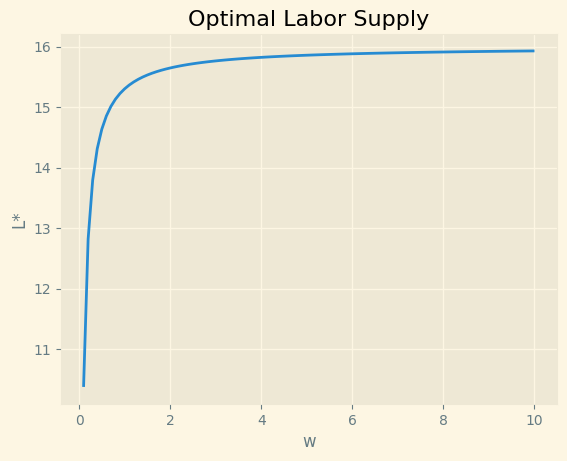

In [9]:
# Define the plot showing the optimal labor supply and how it depends on wage
def plot_optimal_labor_supply():
    # Define symbols and variables
    L, w, tau, alpha, nu, kappa = sp.symbols('L w tau alpha nu kappa')
    
    # Define the expression for tilde_w
    tilde_w = (1 - tau) * w
    
    # Define the optimal labor supply expression
    optimal_L_expr = (-kappa + sp.sqrt(kappa**2 + 4*alpha*tilde_w**2/nu))/(2*tilde_w)
    
    # Convert the expression to a numerical function
    optimal_L_func = sp.lambdify((w, tau, alpha, nu, kappa), optimal_L_expr)
    
    # Define the range of w values
    w_values = np.linspace(0.1, 10, 100)
    
    # Define the given parameter values
    tau_value = 0.3
    alpha_value = 0.5
    nu_value = 1/(2*(16**2))
    kappa_value = 1.0
    
    # Calculate the optimal labor supply for each w value
    optimal_L_values = optimal_L_func(w_values, tau_value, alpha_value, nu_value, kappa_value)

    # Plot the results
    plt.style.use(style)
    plt.plot(w_values, optimal_L_values)
    plt.xlabel('w')
    plt.ylabel('L*')
    plt.title('Optimal Labor Supply')
    plt.grid(True)
    plt.show()

# Call the function to plot the results
plot_optimal_labor_supply()

*We see that as the wage increases the optimal labor supply converges towards a steady state value. So at some point, the increase in on unit wage means less for the worker in terms of one unit extra of work*


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


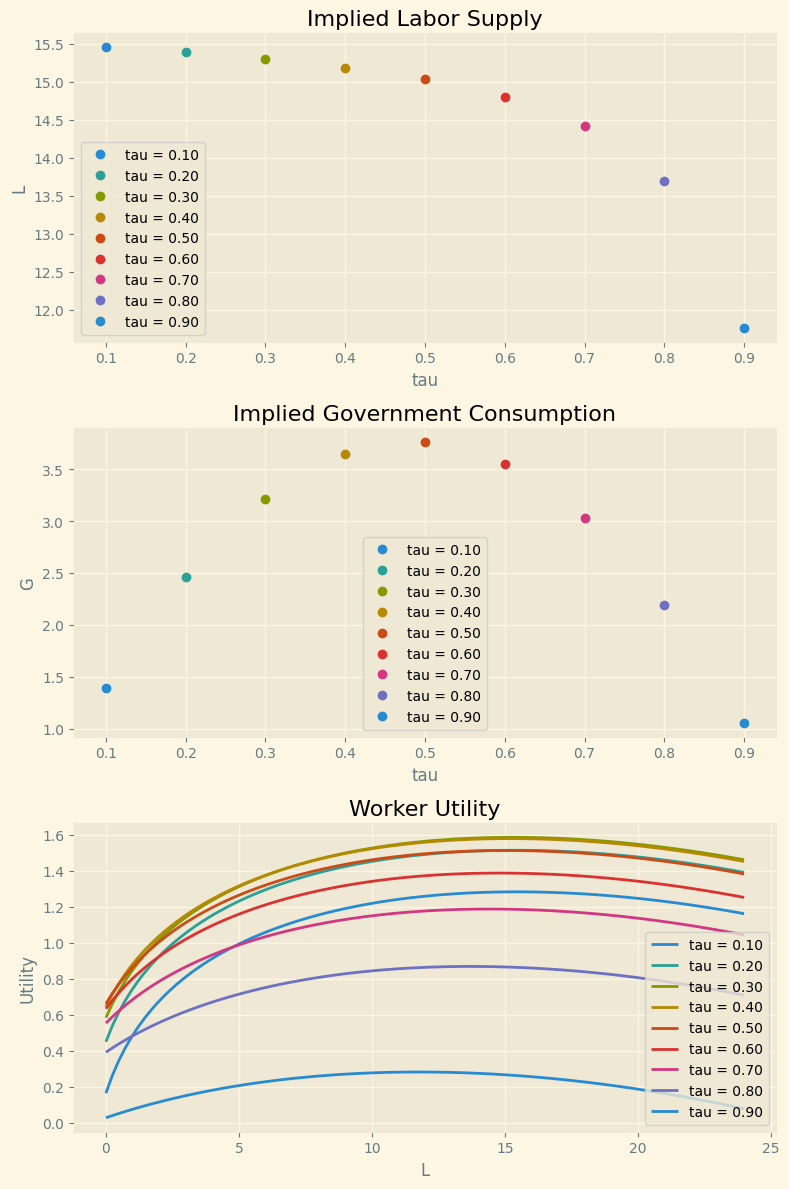

In [10]:
# Define a function that plots the optimal labor supply
def plot_optimal_labor_supply():
    # Define symbols and variables
    L, w, tau, alpha, nu, kappa = sp.symbols('L w tau alpha nu kappa')

    # Define the expression for tilde_w
    tilde_w = (1 - tau) * w

    # Define the optimal labor supply expression
    optimal_L_expr = (-kappa + sp.sqrt(kappa**2 + 4*alpha*tilde_w**2/nu))/(2*tilde_w)

    # Define the expression for government consumption
    G_expr = tau * w * optimal_L_expr*((1-tau)*w)

    # Define the expression for utility
    utility_expr = sp.log((kappa + (1 - tau) * w * L)**alpha * G_expr**(1 - alpha)) - nu * L**2 / 2

    # Convert the expressions to numerical functions
    optimal_L_func = sp.lambdify((w, tau, alpha, nu, kappa), optimal_L_expr)
    G_func = sp.lambdify((w, tau, alpha, nu, kappa), G_expr)
    utility_func = sp.lambdify((w, L, tau, alpha, nu, kappa), utility_expr)

    # Define the range of tau values
    tau_values = np.linspace(0.1, 0.9, 9)

    # Define given parameter values
    w_value = 1.0
    alpha_value = 0.5
    nu_value = 1/(2*16**2)
    kappa_value = 1.0

    # Create subplots for each plot
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))

    # Plot implied L, G, and worker utility for each tau value
    for tau_value in tau_values:
        # Calculate the optimal labor supply for the current tau value
        optimal_L_values = optimal_L_func(w_value, tau_value, alpha_value, nu_value, kappa_value)

        # Calculate the implied government consumption
        G_values = G_func(w_value, tau_value, alpha_value, nu_value, kappa_value)

        # Calculate the worker utility for different L values
        L_values = np.linspace(0, 24, 100)
        utility_values = utility_func(w_value, L_values, tau_value, alpha_value, nu_value, kappa_value)

        # Plot implied L
        axs[0].plot(tau_value, optimal_L_values, 'o', label=f'tau = {tau_value:.2f}')
        axs[0].set_xlabel('tau')
        axs[0].set_ylabel('L')
        axs[0].set_title('Implied Labor Supply')
        axs[0].grid(True)
        plt.style.use(style)

        # Plot implied G
        axs[1].plot(tau_value, G_values, 'o', label=f'tau = {tau_value:.2f}')
        axs[1].set_xlabel('tau')
        axs[1].set_ylabel('G')
        axs[1].set_title('Implied Government Consumption')
        axs[1].grid(True)
        plt.style.use(style)

        # Plot worker utility
        axs[2].plot(L_values, utility_values, label=f'tau = {tau_value:.2f}')
        axs[2].set_xlabel('L')
        axs[2].set_ylabel('Utility')
        axs[2].set_title('Worker Utility')
        axs[2].grid(True)
        plt.style.use(style)

    # Add legends to the plots
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Show the plots
    plt.show()

# Call the function to plot the results
plot_optimal_labor_supply()


*The code calculates the optimal labor supply and the implied government consumption based on the given expressions. It also calculates the worker utility for a range of L values. The plots show the relationships between τ and L, τ and G, and L, utility and tau. Each subplot includes multiple curves corresponding to different τ values.*

*In the first plot showing implied labor supply, we see that the maximal labor supply is 15.5, which corresponds to earlier result, where the labor supply converged towards this level. As the income-tax increases the labor supply decreases. The rate of this decrease intensifies with higher values for the income-tax.*

*In the second plot we see the Laffer-curve, where at some point with a tax-rate above a certain level, the revenue (hence consumption) decreases.*

*In the third plot, we see how utility depends on the labor supply choice and on the income-tax. E.g. we have that for a high income-tax the utility of working is very low in general. As we move towards some lower levels of tau we notice how the utility of working increases. Below we find the exact value for tau that maximizes the utility.*

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

C:\Users\lukas\AppData\Local\Temp\ipykernel_4740\2350624899.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(C ** alpha * G ** (1 - alpha)) - nu * (L ** 2) / 2
c:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


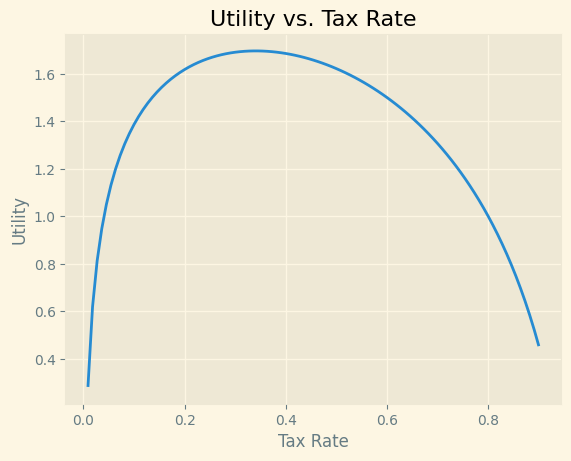

In [11]:
# Define the utility
def utility_so(L, alpha, kappa, nu, w, tau):
    C = kappa + (1 - tau) * w * L
    G = tau * w * L * ((1 - tau) * w)
    return np.log(C ** alpha * G ** (1 - alpha)) - nu * (L ** 2) / 2

# The baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
w = 1.0

# Range of income-tax rates
tau_range = np.linspace(0, 0.9, 100)

# Calculate utility for each tax rate
utility_values = []
for tau in tau_range:
    L_opt = minimize(lambda L: -utility_so(L, alpha, kappa, nu, w, tau), x0=12, bounds=[(0, 24)]).x[0]
    utility_values.append(utility_so(L_opt, alpha, kappa, nu, w, tau))

# Plot utility as a function of tax rate
plt.plot(tau_range, utility_values)
plt.xlabel("Tax Rate")
plt.ylabel("Utility")
plt.title("Utility vs. Tax Rate")
plt.grid(True)
plt.style.use(style)
plt.show()

*From the plot we see how utility evolves for different tax rates, and we suggest a optimum around 0.3. This corresponds well to the plot above with worker utility.* 

*Below we find the exact value to be 0.34:*

In [36]:
# Define the objective function
def objective_opttax(tau, utility_func):
    return -utility_func(tau)

# Define the function that optimizes
def find_optimal_tax_rate(utility_func, initial_guess):
    result = minimize_scalar(objective_opttax, bounds=(0, 1), args=(utility_func,))
    return result.x

# The given baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
w = 1.0

# Define the utility function with the optimal labor supply hours of 15.3 as found earlier.
def utility_without_tax(tau):
    return utility_so(15.3, alpha, kappa, nu, w, tau)

# Find the optimal tax rate - here we use a initial guess of 0.2
optimal_tax_rate = find_optimal_tax_rate(utility_without_tax, 0.2)

print("The optimal tax rate is {:.4f}".format(optimal_tax_rate))


The optimal tax rate is 0.3437


Running this code will output the optimal tax rate that maximizes the utility, given the specified utility function and baseline parameters.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [14]:
# Define the parameters, here also G and tau
alpha = 0.5
nu = 1/(2*16**2)
epsilon = 1
kappa = 1
tau = 0.34
G = 1
w_both = 1

# Define the utility function
def utility_function_(L):
    C = kappa + (1 - tau) * L
    utility = (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon)) / (1 + epsilon)
    return -utility  # Negative sign for maximization

# Define the parameters for the first case
sigma = 1.001
rho = 1.001

# Find the optimal labor supply
result = minimize_scalar(utility_function_, bounds=(0, 24), method='bounded')
optimal_labor_supply_1 = result.x

# Print our results and define G
print("Optimal Labor Supply for rho=1.001 and sigma=1.001 is {:.2f}".format(optimal_labor_supply_1))
G_first = tau*w_both*optimal_labor_supply_1
print("Then G is for the first case {:.2f}".format( G_first))

# Define the parameters for the second case
rho= 1.25
sigma = 1.25

# Find the optimal labor supply
result = minimize_scalar(utility_function_, bounds=(0, 24), method='bounded')
optimal_labor_supply_2 = result.x

# Print our results and define G
print("Optimal Labor Supply for rho=1.25 and sigma=1.25 is {:.2f}".format(optimal_labor_supply_2))
G_second = tau*w_both*optimal_labor_supply_2
print("Then G is for the second case {:.2f}".format( G_second))

Optimal Labor Supply for rho=1.001 and sigma=1.001 is 15.26
Then G is for the first case 5.19
Optimal Labor Supply for rho=1.25 and sigma=1.25 is 14.33
Then G is for the second case 4.87


We see that for higher rho and sigma we get a lower optimal choice of labor and lower value of optimal government consumption. 

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [15]:
import scipy.optimize as optimize

# Define the utility function
def utility_gg(L, w, tau, G):
    C = kappa + (1 - tau) * w * L
    return (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1 - rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon)) / (1 + epsilon)

# Define the objective function for finding the optimal tax rate
def objective_gg(tau, w, G):
    L_star = optimize.fsolve(lambda L: G - tau * w * L, 0.0)
    return -utility_gg(L_star[0], w, tau, G)

# Set initial values for wage and G
w = 1
G_1 = G_first

# Find the socially optimal tax rate given G_first
result_1 = optimize.minimize_scalar(lambda tau: objective_gg(tau, w, G_1), bounds=(0, 1), method='bounded')
tau_star_1 = result_1.x

print("The socially optimal tax rate is {:.4f}".format( tau_star_1))

G_2 = G_second
# Find the socially optimal tax rate given G_first
result_2 = optimize.minimize_scalar(lambda tau: objective_gg(tau, w, G_2), bounds=(0, 1), method='bounded')
tau_star_2 = result_2.x
print("The socially optimal tax rate is {:.4f}".format( tau_star_2))

The socially optimal tax rate is 0.3430
The socially optimal tax rate is 0.3243


The optimal tax rate here are close to the one found in the earlier question. 

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [57]:
#Import py-file
from Examproject import *

# Define the two values for kappa (demand shock) we are solving for
kappa_values = [1.0, 2.0]

# Find the labor supply that maximises profit for each state (the two diffent demand shocks)
# and verify the solution is equal to the one given in the exam text
for kappa in kappa_values:
    optimal_l = find_optimal_l(kappa) # Find the optimal labor supply that maximises profit given kappa
    optimal_profit = calculate_profits(kappa, optimal_l) # Calculate profit given labor supply and kappa

    l_given = ((1-eta)*kappa/w)**(1/eta) # Using the equation from the exam text, we calculate the nummerical value that needs to be verified

    print(f"For kappa = {kappa:.1f}:")
    print(f"Optimal l: {optimal_l:.4f}")
    print(f"Given L: {l_given:.4f}")
    print("-----------------------------")

For kappa = 1.0:
Optimal l: 0.2500
Given L: 0.2500
-----------------------------
For kappa = 2.0:
Optimal l: 1.0000
Given L: 1.0000
-----------------------------


Skriv noget her

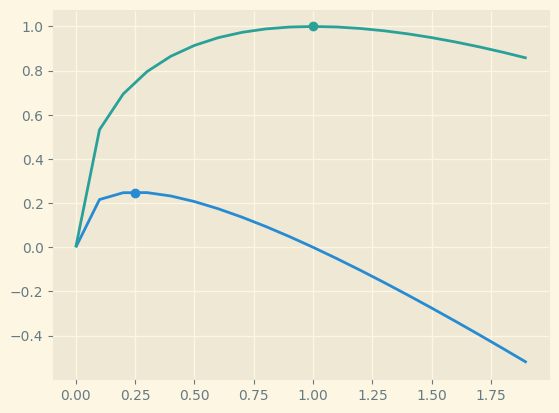

In [48]:
# Simulation
# Run the simulation for each kappa value and plot the result to see if the labor supply given in the exam text fits the simulation results
for kappa in kappa_values:
    l_given = ((1-eta)*kappa/w)**(1/eta)
    verify_max_profit = max(sim(kappa))
    plt.plot(np.arange(0,2,0.1),sim(kappa))
    plt.scatter(l_given,verify_max_profit)
plt.show()

SKriv noget her

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

Noget her

In [58]:
#from Examproject import calculate_H
print("The calculated ex ante expected value (profit) is", calculate_H())

The calculated ex ante expected value (profit) is 27.528260222850296


noget her

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

noget her

In [59]:
print("The calculated ex ante expected value (profit) for the new policy is", calculate_H_new(0.05))

The calculated ex ante expected value (profit) for the new policy is 28.2848794408096


noget her

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

The optimal delta value is found to be 0.080, which maximizes H to 28.3


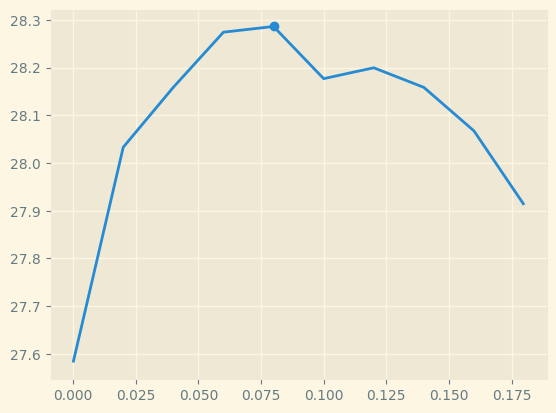

In [60]:

delta_list = []
H_list = []
for delta in np.arange(0, 0.2, 0.02):
    H = calculate_H_new(delta)
    delta_list.append(delta)
    H_list.append(H)

optimal_delta = delta_list[H_list.index(max(H_list))]
max_H = max(H_list)
print(f"The optimal delta value is found to be {optimal_delta:.3f}, which maximizes H to {max_H:.1f}")

plt.plot(delta_list, H_list)
plt.scatter(optimal_delta,max_H)
plt.show()


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [20]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

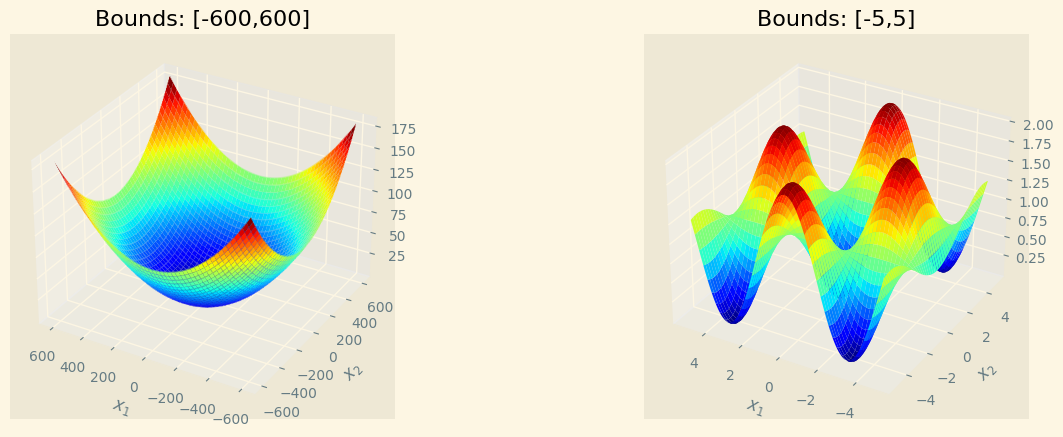

In [23]:
# Visualize
fig = plt.figure(figsize=(15,5))

x = 1
for bound in [600,5]:

    # grids
    x1_vec = np.linspace(-bound,bound,1000)
    x2_vec = np.linspace(-bound,bound,1000)
    x1_grid_griewank,x2_grid_griewank = np.meshgrid(x1_vec,x2_vec,indexing='ij')
    griewank_grid = griewank_(x1_grid_griewank,x2_grid_griewank)

    # 3D
    ax = fig.add_subplot(1,2,x,projection='3d')
    cs = ax.plot_surface(x1_grid_griewank,x2_grid_griewank,griewank_grid,cmap=cm.jet)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.invert_xaxis()
    ax.title.set_text(f'Bounds: [{-bound},{bound}]')
    x += 1

plt.show()

noget her

Optimal solution: [-5.64616093e-09 -2.90272032e-09] -> f = 0.000


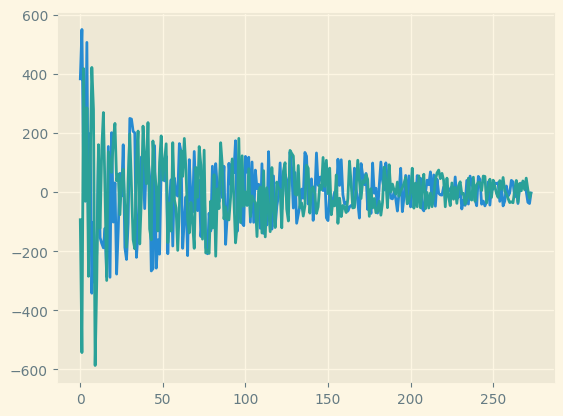

In [61]:
# Test the refined global optimizer
bounds = [-600, 600]
tolerance = 1e-8
K_warmup = 10
K_max = 1000

result = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)
print(f"Optimal solution: {result[0]} -> f = {result[3]:.3f}")
plt.plot(result[1],result[2])
plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

Number of iterations with K_ = 10: 273 -> f = 0.000
Number of iterations with K_ = 100: 469 -> f = 0.000


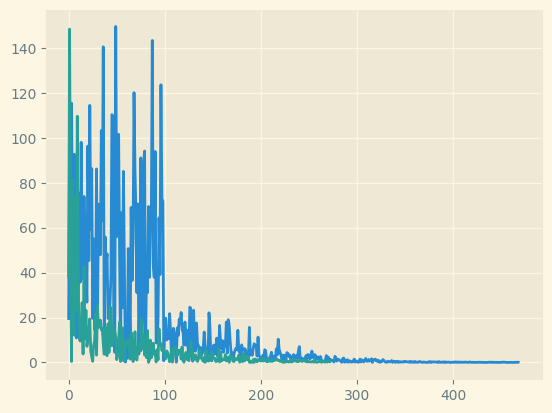

In [62]:
K_warmup_new = 100

result_new = refined_global_optimizer(bounds, tolerance, K_warmup_new, K_max)
print(f"Number of iterations with K_ = 10: {result[1][-1]} -> f = {result[3]:.3f}")
print(f"Number of iterations with K_ = 100: {result_new[1][-1]} -> f = {result_new[3]:.3f}")
plt.plot(result_new[1],result_new[4])
plt.plot(result[1],result[4])
plt.show()